In [2]:
# Tratamiento de datos
import pandas as pd
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
#importar la biblioteca de numpy:
import numpy as np
import os
import sys #permite navegar por el sistema
sys.path.append("../") #solo aplica al soporte
import src.soporte_EDA as se

# Visualización

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format # para redondearlo todo a 2 decimalesort matplotlib.pyplot as plt


In [3]:
df_total_anos = pd.read_pickle(f"../datos/output/datos_all_v1.pkl")

# 1.  ACLARACIÓN DATOS NUMÉRICOS

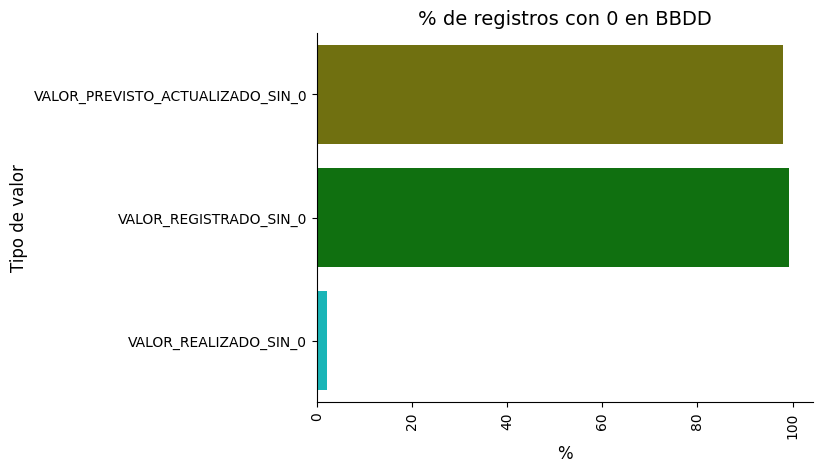

In [4]:
colores = ['olive', 'green', 'darkturquoise']
sns.barplot(data=se.reporte_1(df_total_anos).iloc[17:20,:].reset_index(), x='porcentaje_nulos', y='index', palette=colores)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Tipo de valor', fontsize = 12)
plt.xlabel('%', fontsize = 12)
plt.title('% de registros con 0 en BBDD', fontsize = 14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

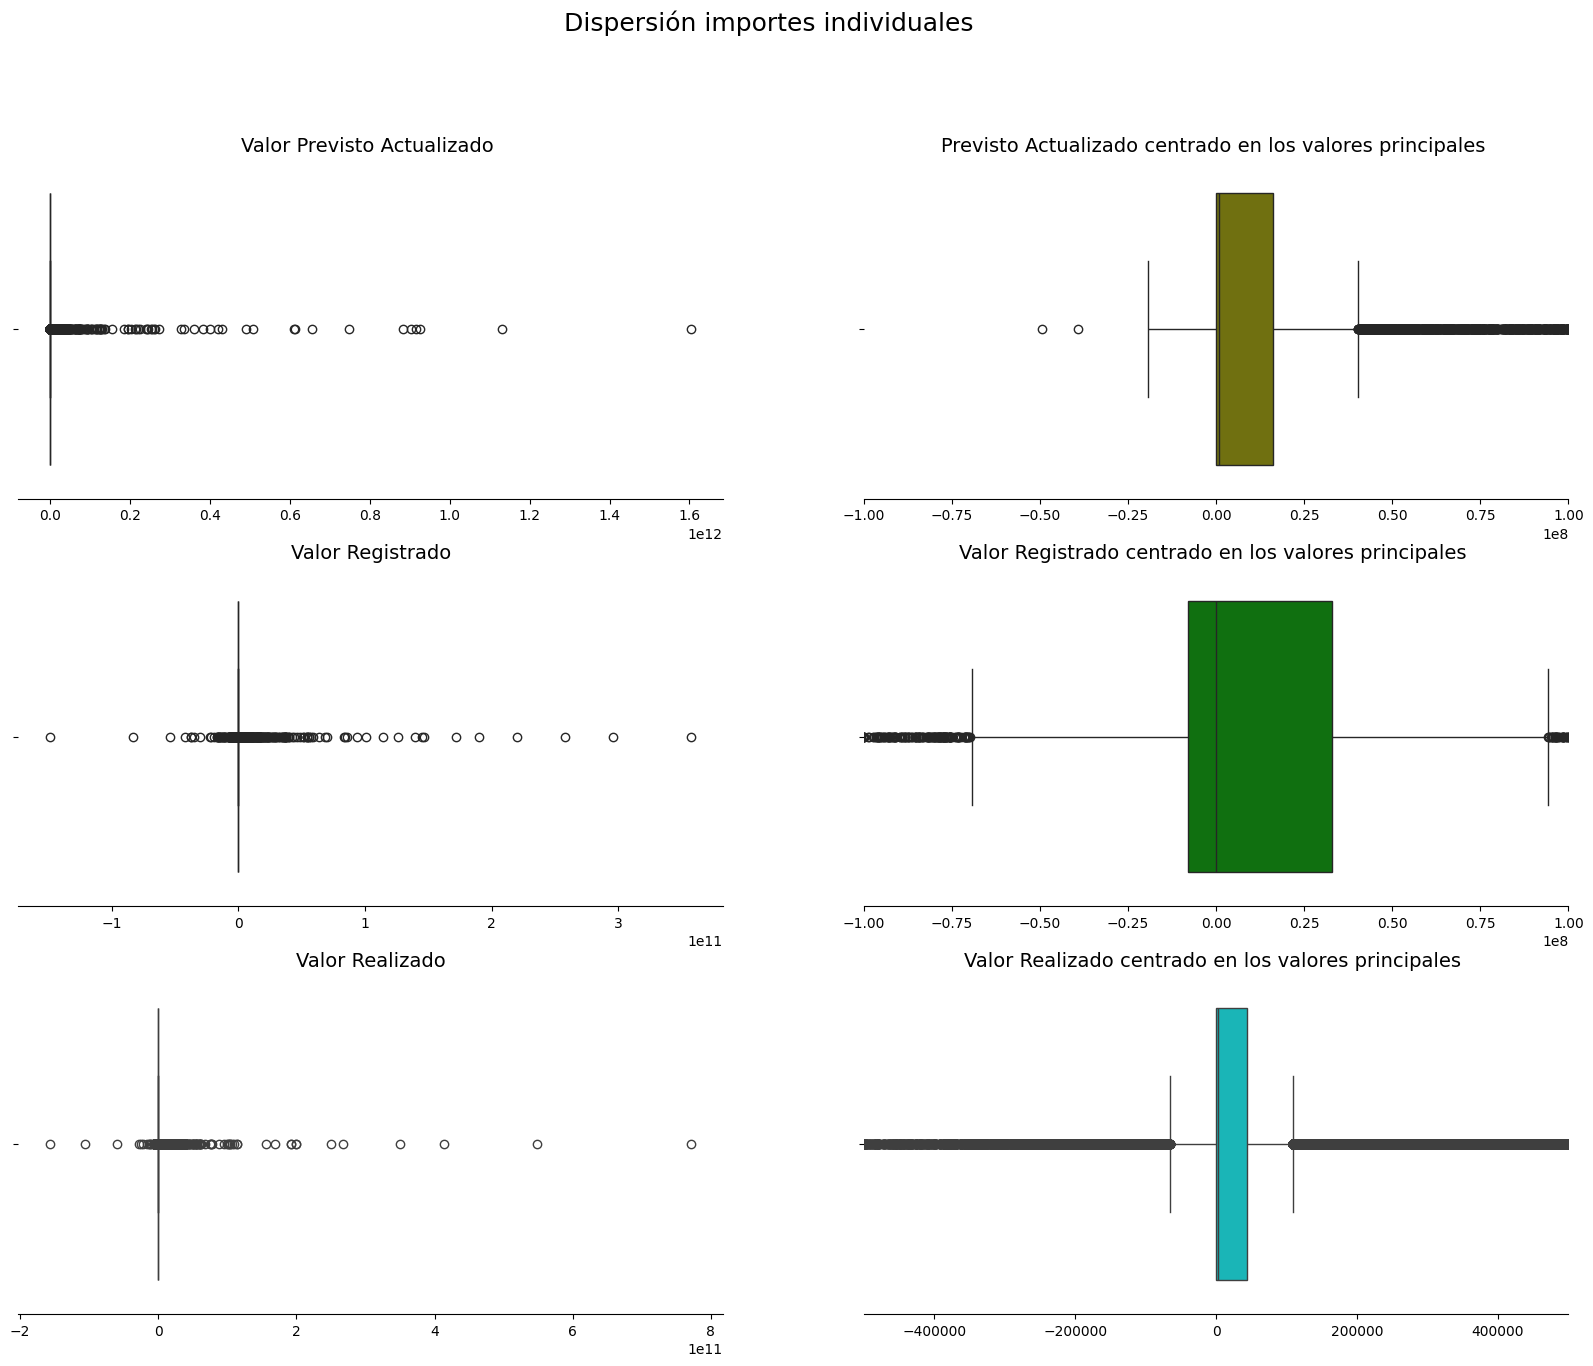

In [5]:
fig, axes = plt.subplots(3, 2, sharex= False, sharey=False, figsize= (20,15))
fig.suptitle('Dispersión importes individuales', fontsize=18)

sns.boxplot(x='VALOR_PREVISTO_ACTUALIZADO_SIN_0', data=df_total_anos, color='olive',ax=axes[0,0])
axes[0,0].set_title('Valor Previsto Actualizado ', fontsize = 14)
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['left'].set_visible(False)
axes[0,0].set_xlabel('', fontsize = 0)

sns.boxplot(x='VALOR_PREVISTO_ACTUALIZADO_SIN_0', data=df_total_anos, color='olive', ax=axes[0,1])
axes[0,1].set_title('Previsto Actualizado centrado en los valores principales ', fontsize = 14)
axes[0,1].set_xlim([-100000000,100000000])
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['left'].set_visible(False)
axes[0,1].set_xlabel('', fontsize = 0)

sns.boxplot(x='VALOR_REGISTRADO_SIN_0', data=df_total_anos, color='green',ax=axes[1,0])
axes[1,0].set_title('Valor Registrado', fontsize = 14)
axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['left'].set_visible(False)
axes[1,0].set_xlabel('', fontsize = 0)


sns.boxplot(x='VALOR_REGISTRADO_SIN_0', data=df_total_anos, color='green', ax=axes[1,1])
axes[1,1].set_title('Valor Registrado centrado en los valores principales ', fontsize = 14)
axes[1,1].set_xlim([-100000000,100000000])
axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['left'].set_visible(False)
axes[1,1].set_xlabel('', fontsize = 0)

sns.boxplot(x='VALOR_REALIZADO_SIN_0', data=df_total_anos, color='darkturquoise',ax=axes[2,0])
axes[2,0].set_title('Valor Realizado', fontsize = 14)
axes[2,0].spines['right'].set_visible(False)
axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['left'].set_visible(False)
axes[2,0].set_xlabel('', fontsize = 0)


sns.boxplot(x='VALOR_REALIZADO_SIN_0', data=df_total_anos, color='darkturquoise', ax=axes[2,1])
axes[2,1].set_title('Valor Realizado centrado en los valores principales ', fontsize = 14)
axes[2,1].set_xlim([-500000,500000])
axes[2,1].spines['right'].set_visible(False)
axes[2,1].spines['top'].set_visible(False)
axes[2,1].spines['left'].set_visible(False)
axes[2,1].set_xlabel('', fontsize = 0);


# 2.  VISUALIZACIONES EVOLUCIÓN HISTÓRICA

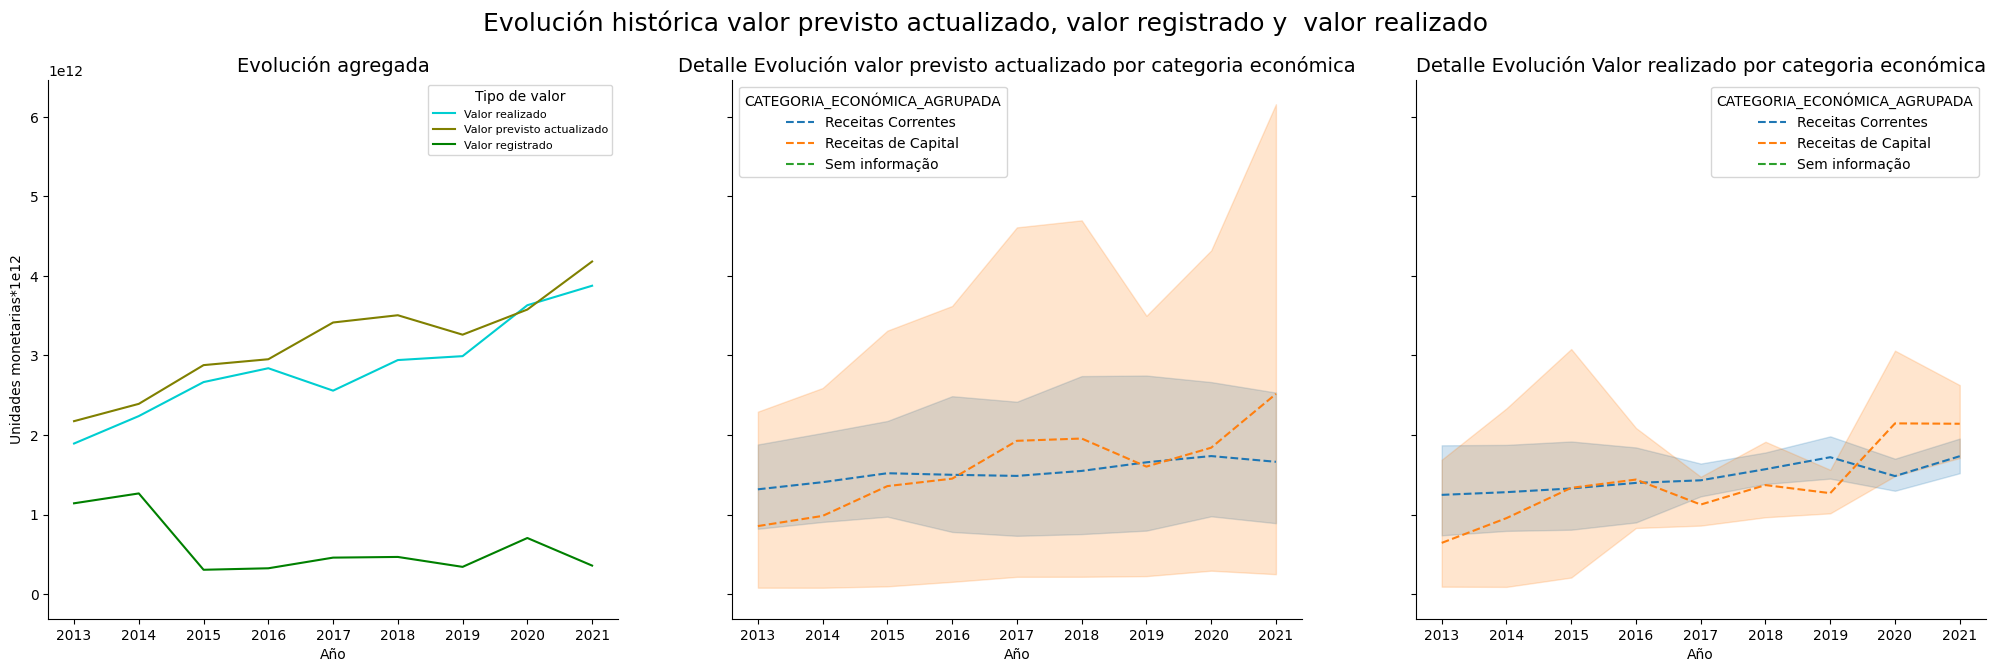

In [6]:
fig, axes = plt.subplots(1, 3, sharex= True, sharey=True, figsize= (25,7))
fig.suptitle('Evolución histórica valor previsto actualizado, valor registrado y  valor realizado', fontsize=18)

sns.lineplot(x='AÑO_EJERCICIO', data=df_total_anos, y='VALOR_REALIZADO_SIN_0',estimator='sum',color='darkturquoise', label='Valor realizado', ax=axes[0], ci=None)
sns.lineplot(x='AÑO_EJERCICIO', data=df_total_anos, y='VALOR_PREVISTO_ACTUALIZADO_SIN_0',estimator='sum',color='olive', label = 'Valor previsto actualizado', ax=axes[0], ci=None)
sns.lineplot(x='AÑO_EJERCICIO', data=df_total_anos, y='VALOR_REGISTRADO_SIN_0',estimator='sum',color='green', label = 'Valor registrado', ax=axes[0], ci=None)
#añadimos el título
axes[0].set_title('Evolución agregada', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[0].set_xlabel("Año")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[0].set_ylabel("Unidades monetarias*1e12")

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].legend()
axes[0].legend(loc ='upper right', fontsize = 8, title = 'Tipo de valor', title_fontsize = 10)


sns.lineplot(x='AÑO_EJERCICIO', y='VALOR_PREVISTO_ACTUALIZADO_SIN_0', data=df_total_anos, hue='CATEGORIA_ECONÓMICA_AGRUPADA', markers=True, estimator='sum', ci=95, linestyle = "dashed", errorbar = None, ax=axes[1])
axes[1].set_title('Detalle Evolución valor previsto actualizado por categoria económica', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[1].set_xlabel("Año")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[1].set_ylabel("Unidades monetarias*1e12")

axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.legend(loc ='upper right', fontsize = 8, title = 'Categoría Ecónomica', title_fontsize =10)

sns.lineplot(x='AÑO_EJERCICIO', y='VALOR_REALIZADO_SIN_0', data=df_total_anos, hue='CATEGORIA_ECONÓMICA_AGRUPADA', markers=True, estimator='sum', ci=95, linestyle = "dashed", errorbar = None, ax=axes[2])

axes[2].set_title('Detalle Evolución Valor realizado por categoria económica', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[2].set_xlabel("Año")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[2].set_ylabel("Unidades monetarias*1e12")

axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False);

In [7]:
df_receitas_capital = df_total_anos[df_total_anos.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas de Capital']
df_receitas_correntes = df_total_anos[df_total_anos.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas Correntes']

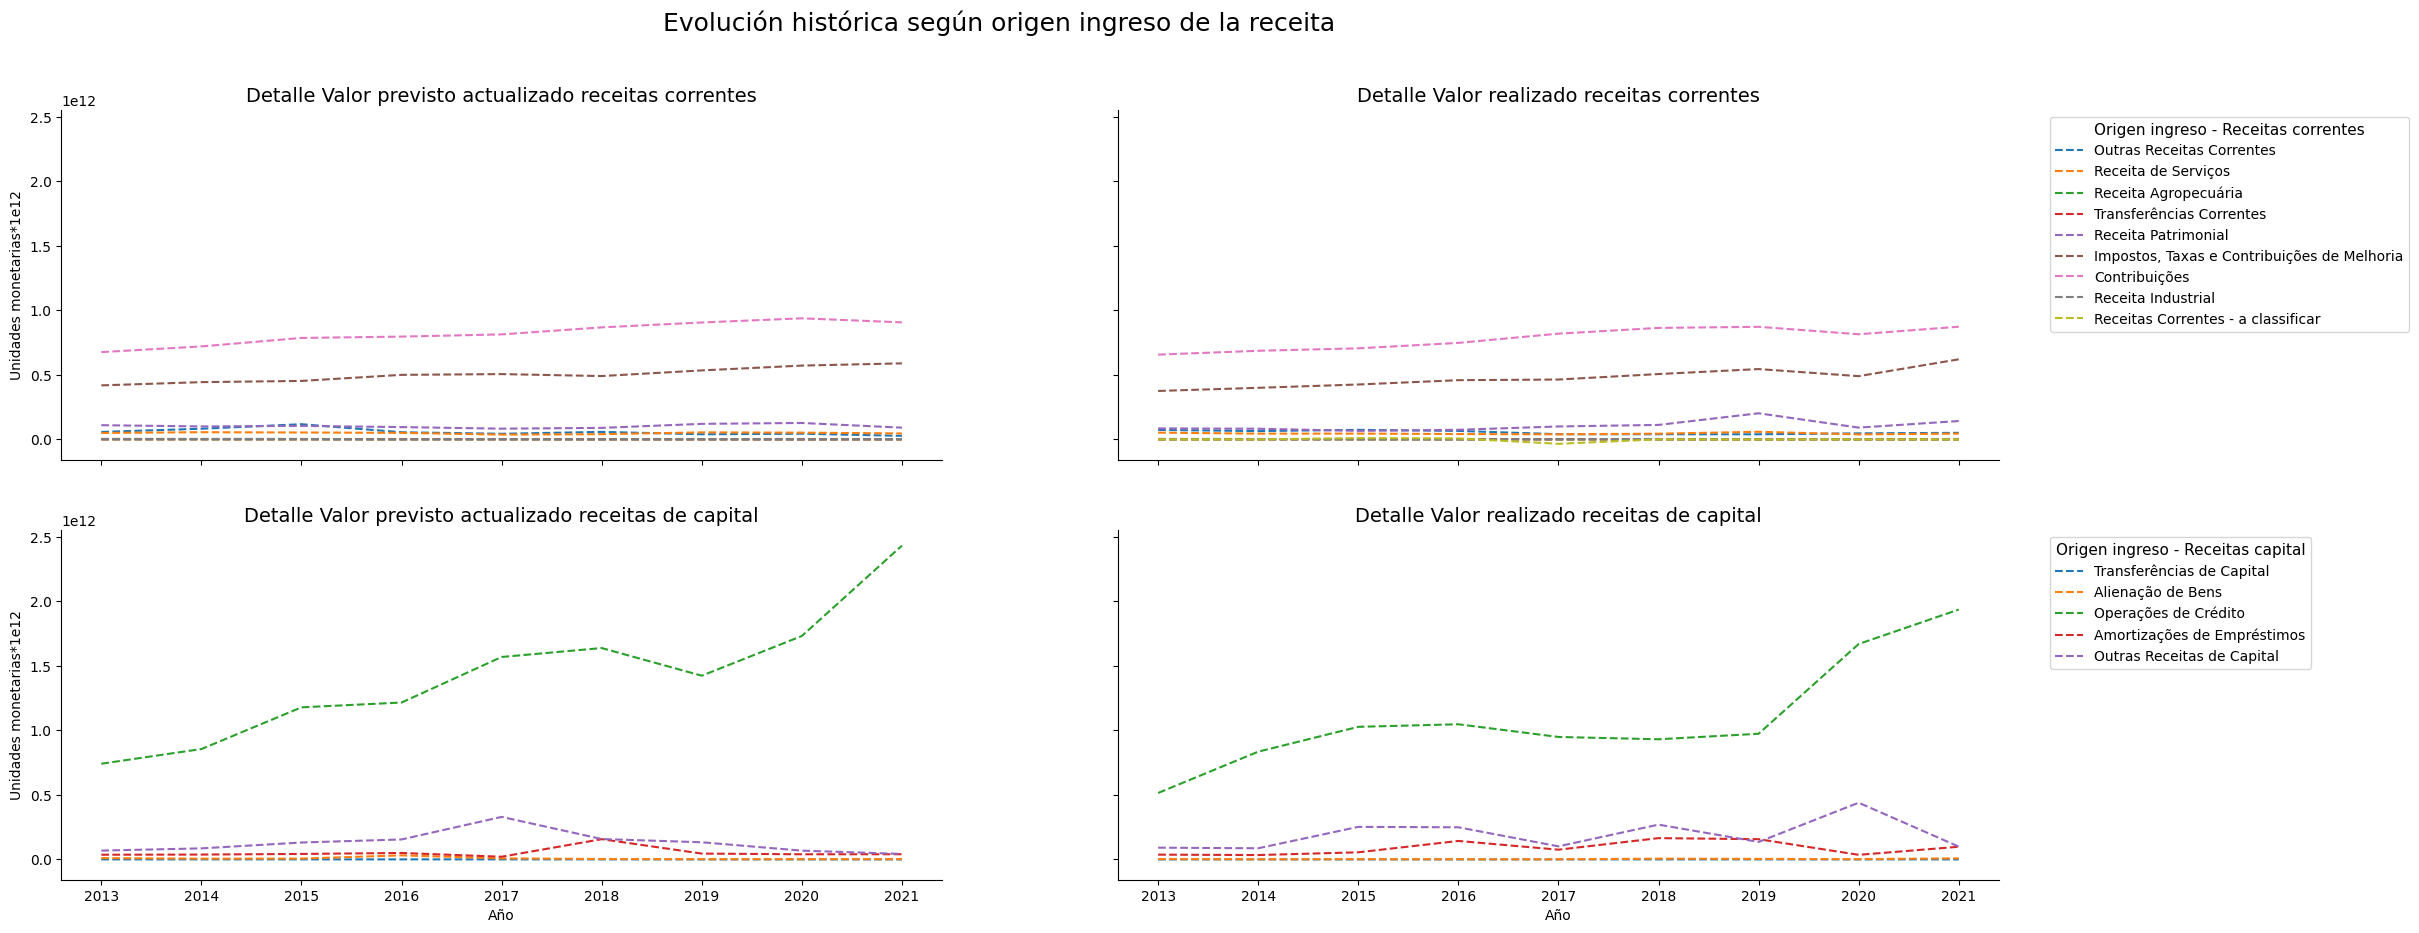

In [8]:
fig, axes = plt.subplots(2, 2, sharex= True, sharey=True, figsize= (25,10))
fig.suptitle('Evolución histórica según origen ingreso de la receita', fontsize=18)


sns.lineplot(x='AÑO_EJERCICIO', y='VALOR_PREVISTO_ACTUALIZADO_SIN_0', data=df_receitas_correntes, hue='ORIGEN_INGRESO', markers=True, estimator='sum', ci=None, linestyle = "dashed", errorbar = None, ax=axes[0,0])
axes[0,0].set_title('Detalle Valor previsto actualizado receitas correntes', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[0,0].set_xlabel("Año")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[0,0].set_ylabel("Unidades monetarias*1e12")

axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['top'].set_visible(False)
axes[0,0].legend().remove()

sns.lineplot(x='AÑO_EJERCICIO', y='VALOR_PREVISTO_ACTUALIZADO_SIN_0', data=df_receitas_capital, hue='ORIGEN_INGRESO', markers=True, estimator='sum', ci=None, linestyle = "dashed", errorbar = None, ax=axes[1,0])

axes[1,0].set_title('Detalle Valor previsto actualizado receitas de capital', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[1,0].set_xlabel("Año")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[1,0].set_ylabel("Unidades monetarias*1e12")

axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].legend().remove()



sns.lineplot(x='AÑO_EJERCICIO', y='VALOR_REALIZADO_SIN_0', data=df_receitas_correntes, hue='ORIGEN_INGRESO', markers=True, estimator='sum', ci=None, linestyle = "dashed", errorbar = None, ax=axes[0,1])
axes[0,1].set_title('Detalle Valor realizado receitas correntes', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[0,1].set_xlabel("Año")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[0,1].set_ylabel("Unidades monetarias*1e12")

axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title= 'Origen ingreso - Receitas correntes', title_fontsize = 11)

sns.lineplot(x='AÑO_EJERCICIO', y='VALOR_REALIZADO_SIN_0', data=df_receitas_capital, hue='ORIGEN_INGRESO', markers=True, estimator='sum', ci=None, linestyle = "dashed", errorbar = None, ax=axes[1,1])

axes[1,1].set_title('Detalle Valor realizado receitas de capital', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[1,1].set_xlabel("Año")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[1,1].set_ylabel("Unidades monetarias*1e12")

axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title= 'Origen ingreso - Receitas capital', title_fontsize = 11);

In [9]:
df_total_anos_analisis_meses= df_total_anos[df_total_anos.AÑO_EJERCICIO>=2016]

df_total_anos_analisis_meses["Mes"] = df_total_anos_analisis_meses['FECHA_REGISTRO'].dt.month_name()


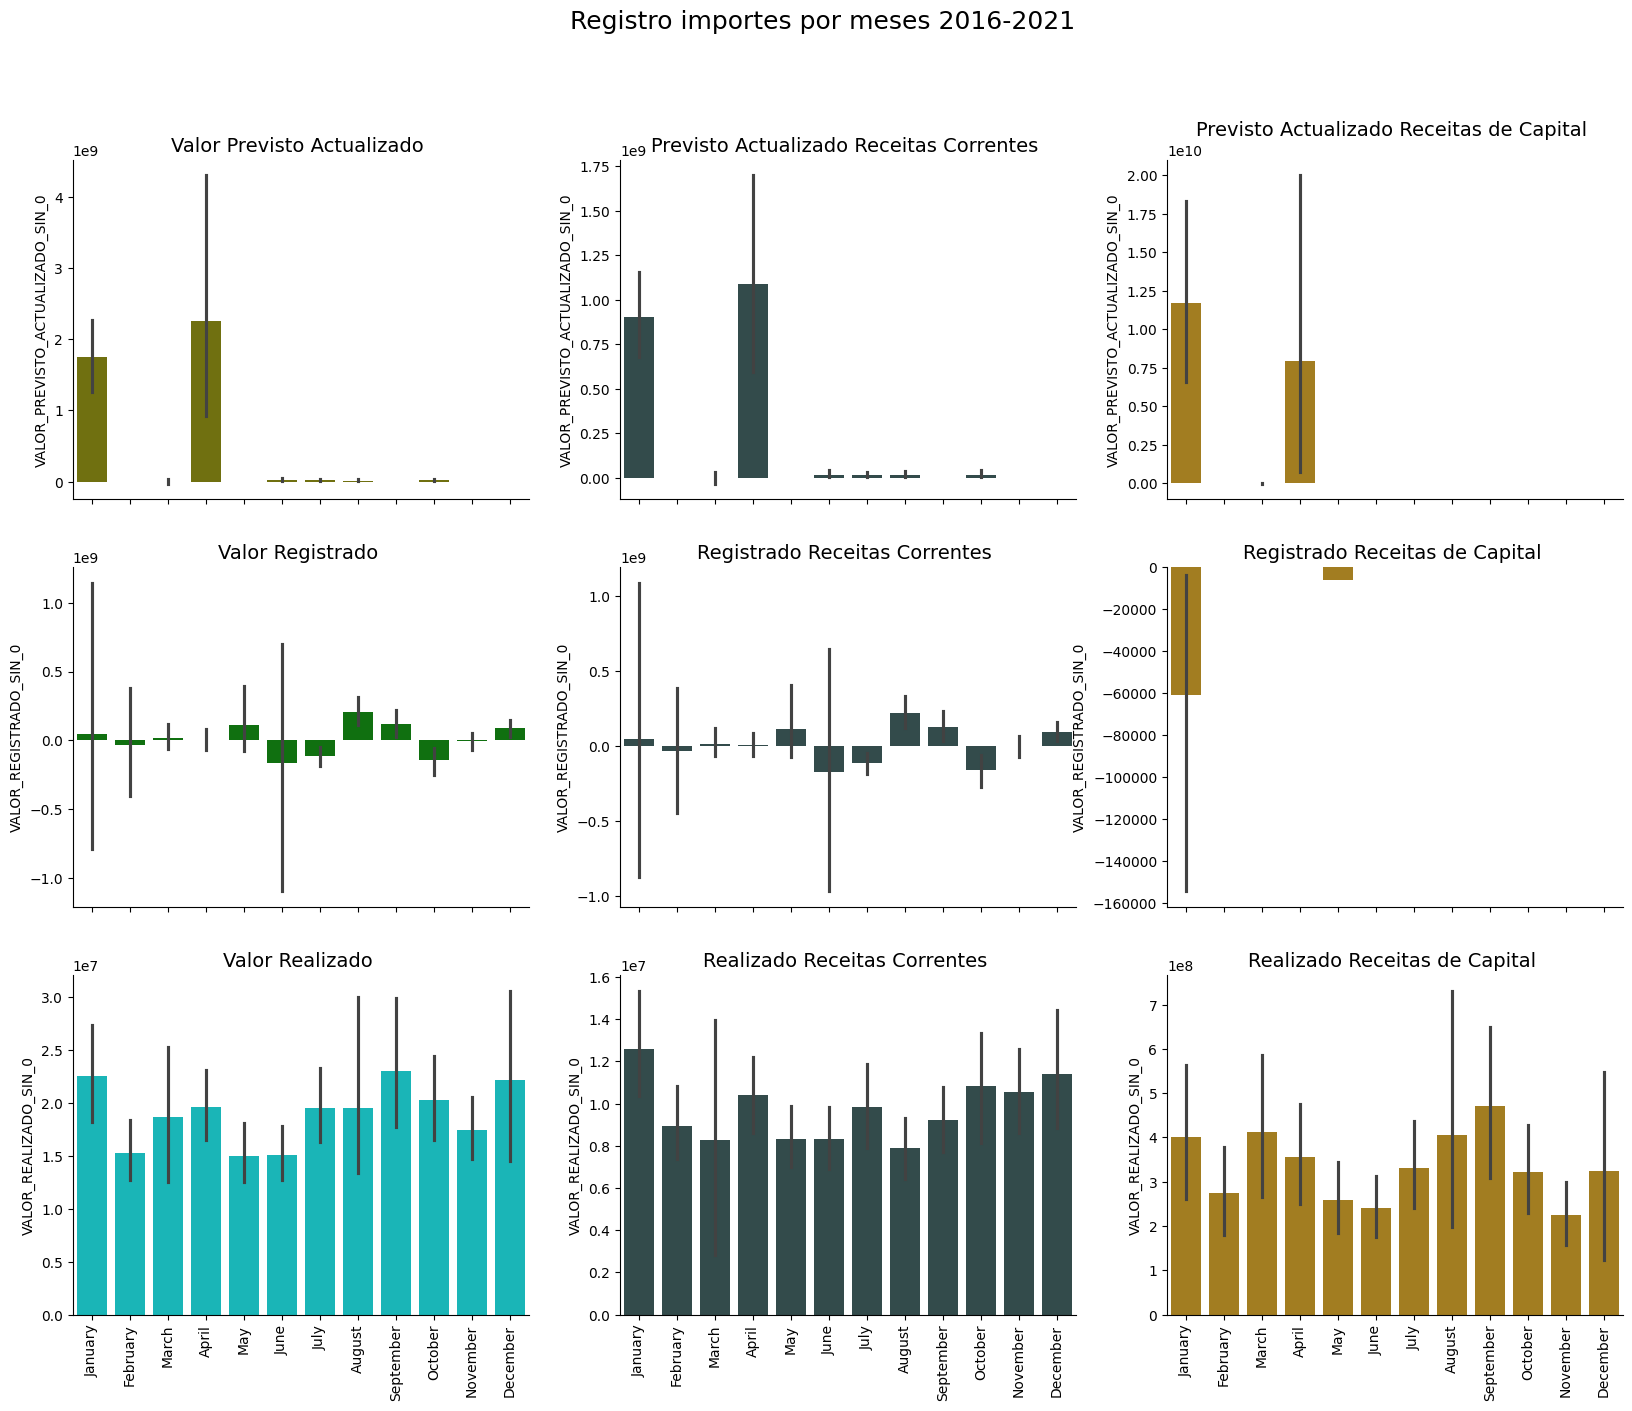

In [10]:
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(3, 3, sharex= True, sharey=False, figsize= (20,15))
fig.suptitle('Registro importes por meses 2016-2021', fontsize=18)

sns.barplot(x='Mes', y= 'VALOR_PREVISTO_ACTUALIZADO_SIN_0', data= df_total_anos_analisis_meses, order=orden_meses, color='olive',ax=axes[0,0])
axes[0,0].set_title('Valor Previsto Actualizado ', fontsize = 14)
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['top'].set_visible(False)
axes[0,0].set_xlabel('', fontsize = 0)
axes[0,0].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(x='Mes', y= 'VALOR_PREVISTO_ACTUALIZADO_SIN_0', data= df_total_anos_analisis_meses[df_total_anos_analisis_meses.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas Correntes'], order=orden_meses, color='darkslategrey', ax=axes[0,1])
axes[0,1].set_title('Previsto Actualizado Receitas Correntes ', fontsize = 14)
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[0,1].set_xlabel('', fontsize = 0)
axes[0,1].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(x='Mes', y= 'VALOR_PREVISTO_ACTUALIZADO_SIN_0', data= df_total_anos_analisis_meses[df_total_anos_analisis_meses.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas de Capital'], order=orden_meses, color='darkgoldenrod', ax=axes[0,2])
axes[0,2].set_title('Previsto Actualizado Receitas de Capital ', fontsize = 14)
axes[0,2].spines['right'].set_visible(False)
axes[0,2].spines['top'].set_visible(False)
axes[0,2].set_xlabel('', fontsize = 0)
axes[0,2].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(x='Mes', y= 'VALOR_REGISTRADO_SIN_0', data= df_total_anos_analisis_meses, order=orden_meses, color='green',ax=axes[1,0])
axes[1,0].set_title('Valor Registrado ', fontsize = 14)
axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].set_xlabel('', fontsize = 0)
axes[1,0].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(x='Mes', y= 'VALOR_REGISTRADO_SIN_0', data= df_total_anos_analisis_meses[df_total_anos_analisis_meses.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas Correntes'], order=orden_meses, color='darkslategrey', ax=axes[1,1])
axes[1,1].set_title('Registrado Receitas Correntes ', fontsize = 14)
axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].set_xlabel('', fontsize = 0)
axes[1,1].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(x='Mes', y= 'VALOR_REGISTRADO_SIN_0', data= df_total_anos_analisis_meses[df_total_anos_analisis_meses.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas de Capital'], order=orden_meses, color='darkgoldenrod', ax=axes[1,2])
axes[1,2].set_title('Registrado Receitas de Capital ', fontsize = 14)
axes[1,2].spines['right'].set_visible(False)
axes[1,2].spines['top'].set_visible(False)
axes[1,2].set_xlabel('', fontsize = 0)
axes[1,2].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(x='Mes', y= 'VALOR_REALIZADO_SIN_0', data= df_total_anos_analisis_meses, order=orden_meses, color='darkturquoise',ax=axes[2,0])
axes[2,0].set_title('Valor Realizado ', fontsize = 14)
axes[2,0].spines['right'].set_visible(False)
axes[2,0].spines['top'].set_visible(False)
axes[2,0].set_xlabel('', fontsize = 0)
axes[2,0].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(x='Mes', y= 'VALOR_REALIZADO_SIN_0', data= df_total_anos_analisis_meses[df_total_anos_analisis_meses.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas Correntes'], order=orden_meses, color='darkslategrey', ax=axes[2,1])
axes[2,1].set_title('Realizado Receitas Correntes ', fontsize = 14)
axes[2,1].spines['right'].set_visible(False)
axes[2,1].spines['top'].set_visible(False)
axes[2,1].set_xlabel('', fontsize = 0)
axes[2,1].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(x='Mes', y= 'VALOR_REALIZADO_SIN_0', data= df_total_anos_analisis_meses[df_total_anos_analisis_meses.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas de Capital'], order=orden_meses, color='darkgoldenrod', ax=axes[2,2])
axes[2,2].set_title('Realizado Receitas de Capital ', fontsize = 14)
axes[2,2].spines['right'].set_visible(False)
axes[2,2].spines['top'].set_visible(False)
axes[2,2].set_xlabel('', fontsize = 0)
axes[2,2].tick_params(axis='x', rotation=90, labelsize=10);

In [11]:
df_importes_agrupación_anos=df_total_anos.groupby('AÑO_EJERCICIO')[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].agg(["mean", "sum", "count"]).reset_index()

df_importes_agrupación_anos["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_importes_agrupación_anos.iloc[:,8]/df_importes_agrupación_anos.iloc[:,2])*100
df_importes_agrupación_anos["DIF VALOR_REALIZADO Y VALOR_PREVISTO_ACTUALIZADO"] = ((df_importes_agrupación_anos.iloc[:,2]-df_importes_agrupación_anos.iloc[:,8])/df_importes_agrupación_anos.iloc[:,2])*100

df_importes_agrupación_anos['Peso_categoria']=df_importes_agrupación_anos.iloc[:,9]/df_importes_agrupación_anos.iloc[:,9].sum()*100
df_importes_agrupación_anos['Peso total valor realizado']=df_importes_agrupación_anos.iloc[:,8]/df_total_anos.VALOR_REALIZADO.sum()
#df_importes_agrupación_anos

In [12]:
df_importes_agrupación_anos_1 = df_total_anos.groupby(['AÑO_EJERCICIO', 'CATEGORIA_ECONÓMICA_AGRUPADA'])[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].sum()

df_importes_agrupación_anos_1["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_importes_agrupación_anos_1.VALOR_REALIZADO_SIN_0/df_importes_agrupación_anos_1.VALOR_PREVISTO_ACTUALIZADO_SIN_0)*100

df_importes_agrupación_anos_1=df_importes_agrupación_anos_1.sort_values('VALOR_PREVISTO_ACTUALIZADO_SIN_0', ascending=False)
#df_importes_agrupación_anos_1


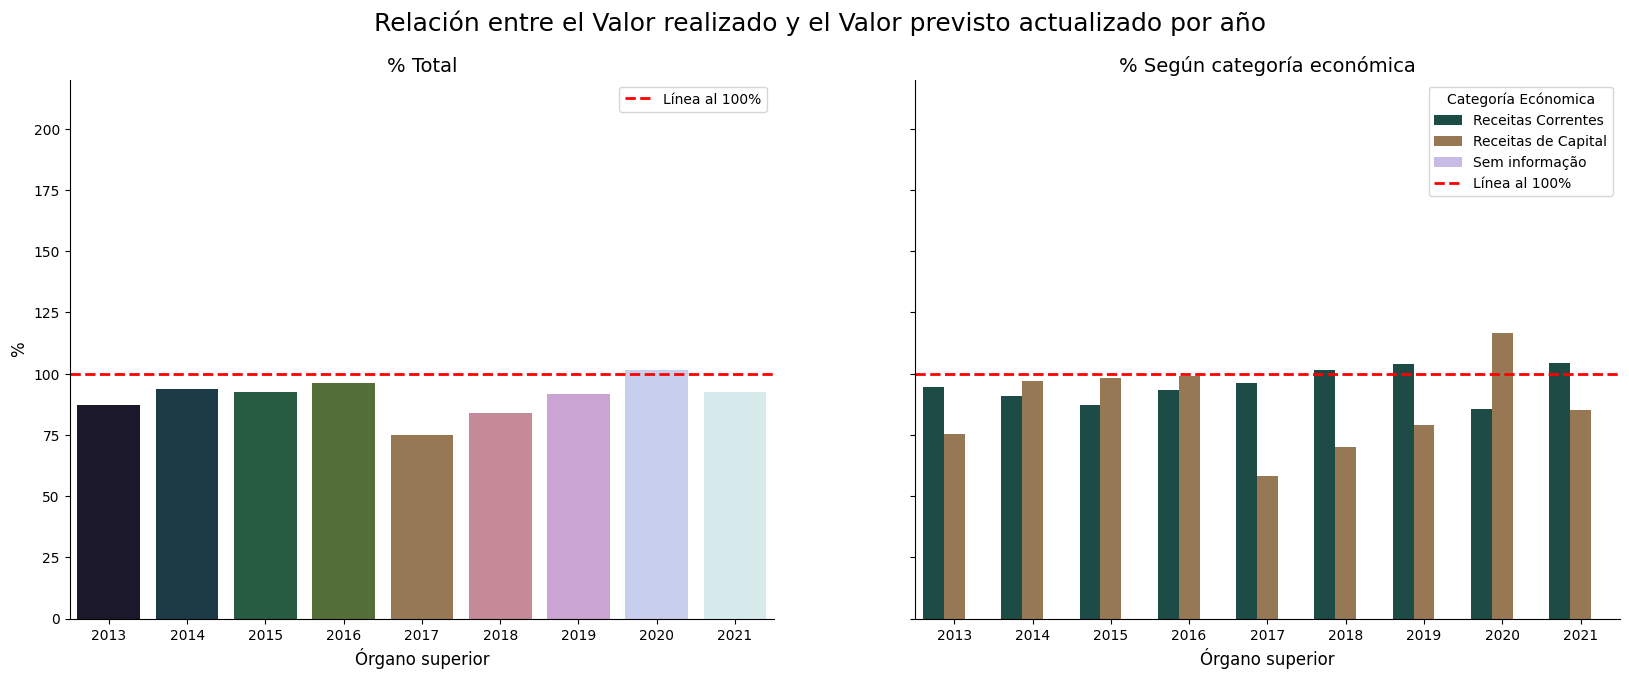

In [13]:
fig, axes = plt.subplots(1, 2, sharex= True, sharey=True, figsize= (20,7))
fig.suptitle('Relación entre el Valor realizado y el Valor previsto actualizado por año', fontsize=18)

sns.barplot(data=df_importes_agrupación_anos, x='AÑO_EJERCICIO', y='VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', palette='cubehelix', ax=axes[0])
axes[0].set_ylabel('%', fontsize = 12)
axes[0].set_xlabel('Órgano superior', fontsize = 12)
axes[0].set_title('% Total', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Línea al 100%')
axes[0].legend()

sns.barplot(data=df_importes_agrupación_anos_1, x='AÑO_EJERCICIO', y='VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO',hue='CATEGORIA_ECONÓMICA_AGRUPADA', hue_order=['Receitas Correntes', 'Receitas de Capital', 'Sem informação'],palette='cubehelix', ax=axes[1])
axes[1].set_ylabel('%', fontsize = 12)
axes[1].set_xlabel('Órgano superior', fontsize = 12)
axes[1].set_title('% Según categoría económica', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_ylim([0,220])
axes[1].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Línea al 100%')
axes[1].legend(title = 'Categoría Ecónomica', title_fontsize =10);

In [14]:
df_importes_agrupación_ano = df_total_anos.groupby('AÑO_EJERCICIO')[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].sum()

In [15]:
df_importes_agrupación_organo_superior = df_total_anos.groupby('NOMBRE_ÓRGANO_SUPERIOR')[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].sum()
df_importes_agrupación_organo_superior = df_importes_agrupación_organo_superior.sort_values('VALOR_PREVISTO_ACTUALIZADO_SIN_0', ascending=False)

df_importes_agrupación_organo_superior["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_importes_agrupación_organo_superior.VALOR_REALIZADO_SIN_0/df_importes_agrupación_organo_superior.VALOR_PREVISTO_ACTUALIZADO_SIN_0)*100

df_importes_agrupación_organo_superior = df_importes_agrupación_organo_superior.sort_values('VALOR_PREVISTO_ACTUALIZADO_SIN_0', ascending=False)
df_importes_agrupación_organo_superior_sin_Ministério_da_Economia = df_importes_agrupación_organo_superior.tail(24)

In [16]:
df_importes_agrupación_organo_superior_1 = df_total_anos.groupby(['NOMBRE_ÓRGANO_SUPERIOR', 'CATEGORIA_ECONÓMICA_AGRUPADA'])[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].sum()

df_importes_agrupación_organo_superior_1["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_importes_agrupación_organo_superior_1.VALOR_REALIZADO_SIN_0/df_importes_agrupación_organo_superior_1.VALOR_PREVISTO_ACTUALIZADO_SIN_0)*100

df_importes_agrupación_organo_superior_1=df_importes_agrupación_organo_superior_1.sort_values('VALOR_PREVISTO_ACTUALIZADO_SIN_0', ascending=False)
df_importes_agrupación_organo_superior_1.shape
df_importes_agrupación_organo_superior_1_sin_Ministério_da_Economia = df_importes_agrupación_organo_superior_1.tail(50)


# 3.  VISUALIZACIONES POR ÓRGANO SUPERIOR

In [17]:
print(f'Elimino de la siguiente gráfica el {df_importes_agrupación_organo_superior.index[0]} porque al incluirlo los valores del resto de órganos no se aprecian ya que: ')
print(f'- El valor previsto actualizado del {df_importes_agrupación_organo_superior.index[0]} es {round(df_importes_agrupación_organo_superior.VALOR_PREVISTO_ACTUALIZADO_SIN_0[0],2)} siendo {round(df_importes_agrupación_organo_superior.VALOR_PREVISTO_ACTUALIZADO_SIN_0[0]/df_importes_agrupación_organo_superior.VALOR_PREVISTO_ACTUALIZADO_SIN_0[1],2)} veces mayor al del {df_importes_agrupación_organo_superior.index[1]}  ')
print(f'- El valor previsto actualizado del {df_importes_agrupación_organo_superior.index[0]} es {round(df_importes_agrupación_organo_superior.VALOR_REALIZADO_SIN_0[0],2)} siendo {round(df_importes_agrupación_organo_superior.VALOR_REALIZADO_SIN_0[0]/df_importes_agrupación_organo_superior.VALOR_REALIZADO_SIN_0[1],2)} veces mayor al del {df_importes_agrupación_organo_superior.index[1]}  ')
print(f'Asimismo, la relación entre el valor previsto actualizado y el valor realizado del {df_importes_agrupación_organo_superior.index[0]} es {round(df_importes_agrupación_organo_superior['VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO'][0],2)}%')

Elimino de la siguiente gráfica el Ministério da Economia porque al incluirlo los valores del resto de órganos no se aprecian ya que: 
- El valor previsto actualizado del Ministério da Economia es 26486420136019.0 siendo 43.45 veces mayor al del Ministério da Educação  
- El valor previsto actualizado del Ministério da Economia es 24709753338137.24 siendo 111.51 veces mayor al del Ministério da Educação  
Asimismo, la relación entre el valor previsto actualizado y el valor realizado del Ministério da Economia es 93.29%


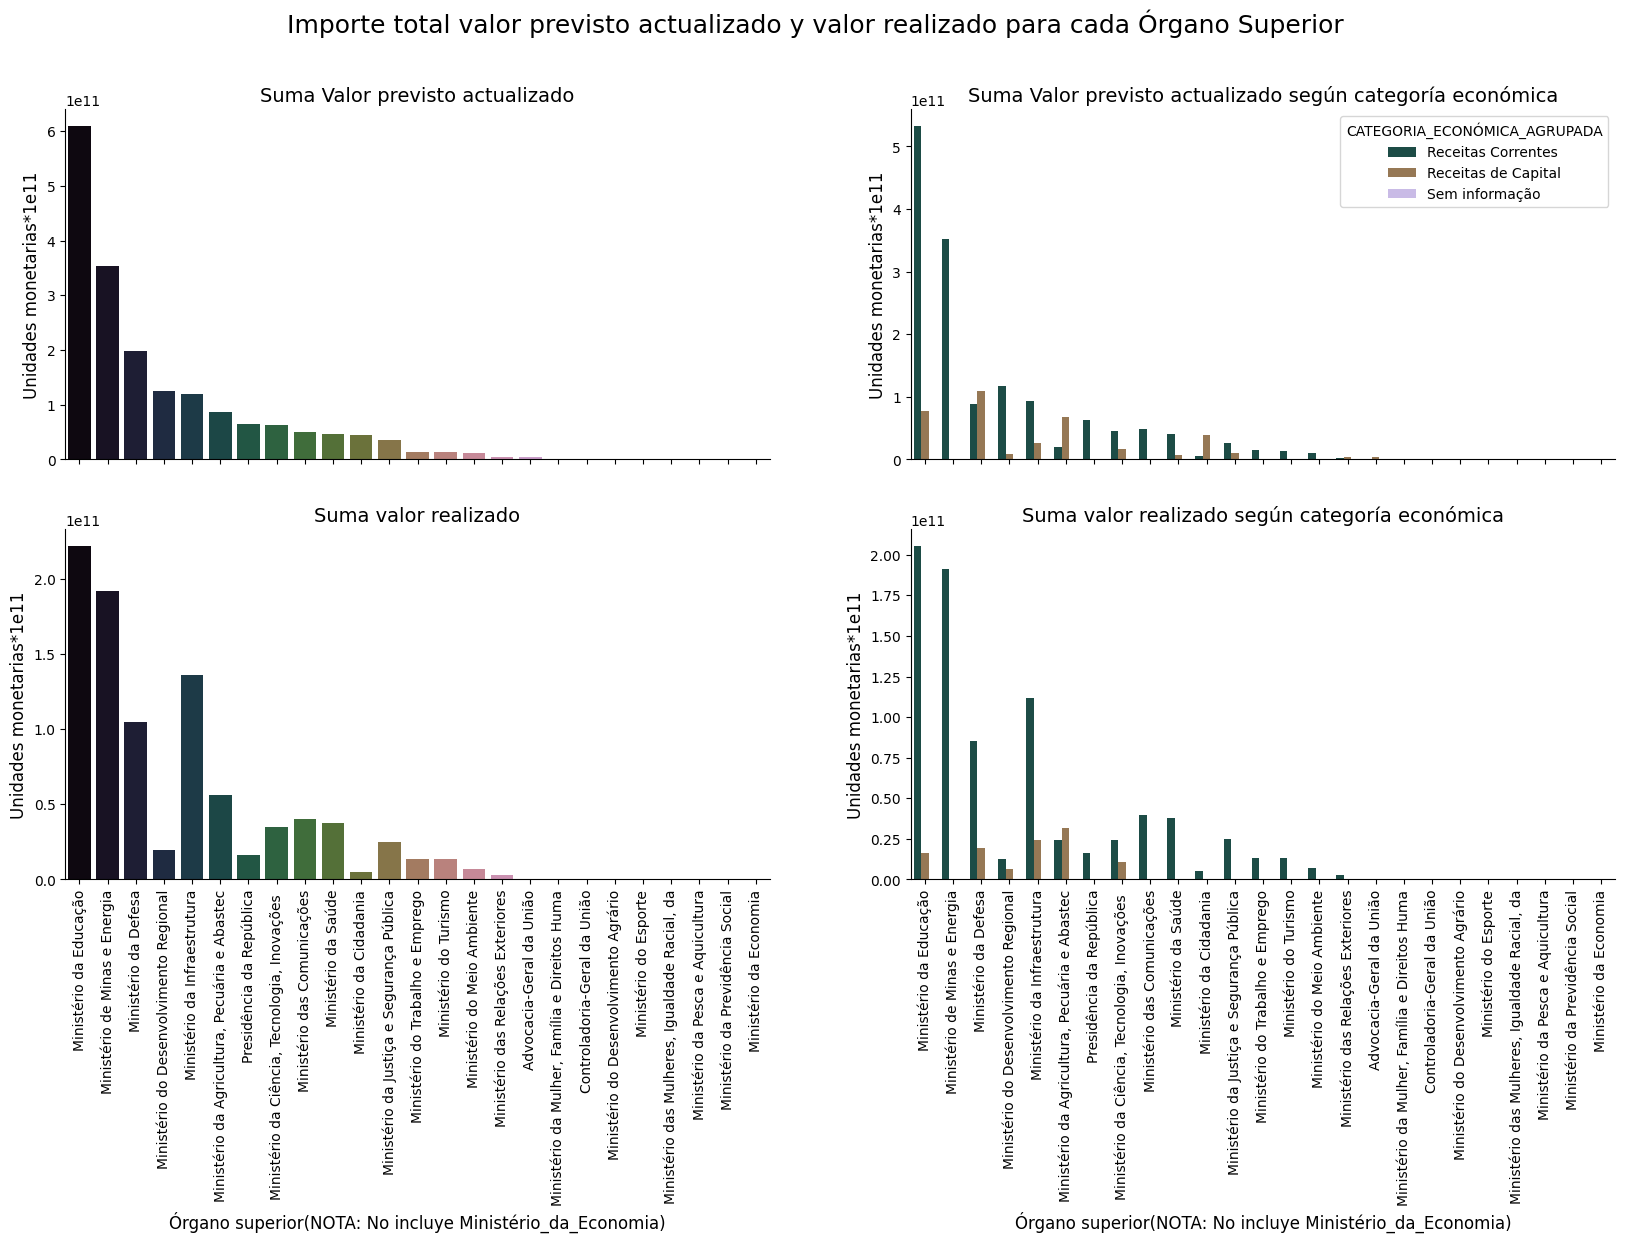

In [18]:
fig, axes = plt.subplots(2, 2, sharex= True, sharey=False, figsize= (20,10))
# Añadir un súper título a la figura
fig.suptitle('Importe total valor previsto actualizado y valor realizado para cada Órgano Superior', fontsize=18)

sns.barplot(data=df_importes_agrupación_organo_superior_sin_Ministério_da_Economia, x='NOMBRE_ÓRGANO_SUPERIOR', y='VALOR_PREVISTO_ACTUALIZADO_SIN_0', palette='cubehelix', ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0,0].set_ylabel('Unidades monetarias*1e11', fontsize = 12)
axes[0,0].set_xlabel('Órgano superior(NOTA: No incluye Ministério_da_Economia)', fontsize = 12)
axes[0,0].set_title('Suma Valor previsto actualizado', fontsize = 14)
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['top'].set_visible(False)

sns.barplot(data=df_importes_agrupación_organo_superior_sin_Ministério_da_Economia, x='NOMBRE_ÓRGANO_SUPERIOR', y='VALOR_REALIZADO_SIN_0', palette='cubehelix', ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=90, labelsize=10)
axes[1,0].set_ylabel('Unidades monetarias*1e11', fontsize = 12)
axes[1,0].set_xlabel('Órgano superior(NOTA: No incluye Ministério_da_Economia)', fontsize = 12)
axes[1,0].set_title('Suma valor realizado', fontsize = 14)
axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['top'].set_visible(False)

sns.barplot(data=df_importes_agrupación_organo_superior_1_sin_Ministério_da_Economia, x='NOMBRE_ÓRGANO_SUPERIOR', y='VALOR_PREVISTO_ACTUALIZADO_SIN_0', hue='CATEGORIA_ECONÓMICA_AGRUPADA', palette='cubehelix', ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=90, labelsize=10)
axes[0,1].set_ylabel('Unidades monetarias*1e11', fontsize = 12)
axes[0,1].set_xlabel('Órgano superior(NOTA: No incluye Ministério_da_Economia)', fontsize = 12)
axes[0,1].set_title('Suma Valor previsto actualizado según categoría económica', fontsize = 14)
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)

sns.barplot(data=df_importes_agrupación_organo_superior_1_sin_Ministério_da_Economia, x='NOMBRE_ÓRGANO_SUPERIOR', y='VALOR_REALIZADO_SIN_0', hue='CATEGORIA_ECONÓMICA_AGRUPADA', palette='cubehelix', ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1,1].set_ylabel('Unidades monetarias*1e11', fontsize = 12)
axes[1,1].set_xlabel('Órgano superior(NOTA: No incluye Ministério_da_Economia)', fontsize = 12)
axes[1,1].set_title('Suma valor realizado según categoría económica', fontsize = 14)
axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].legend().remove()


In [19]:
df_importes_agrupación_organo_superior_2 = df_total_anos.groupby(['NOMBRE_ÓRGANO_SUPERIOR', 'CATEGORIA_ECONÓMICA_AGRUPADA'])[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].agg(["mean", "sum", "count"]).reset_index()

df_importes_agrupación_organo_superior_2["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_importes_agrupación_organo_superior_2.iloc[:,9]/df_importes_agrupación_organo_superior_2.iloc[:,3])*100
df_importes_agrupación_organo_superior_2["DIF VALOR_REALIZADO Y VALOR_PREVISTO_ACTUALIZADO"] = ((df_importes_agrupación_organo_superior_2.iloc[:,3]-df_importes_agrupación_organo_superior_2.iloc[:,9])/df_importes_agrupación_organo_superior_2.iloc[:,3])*100

df_importes_agrupación_organo_superior_2['Peso_categoria']=df_importes_agrupación_organo_superior_2.iloc[:,10]/df_importes_agrupación_organo_superior_2.iloc[:,10].sum()*100
df_importes_agrupación_organo_superior_2['Peso_total_valor_realizado']=df_importes_agrupación_organo_superior_2.iloc[:,9]/df_total_anos.VALOR_REALIZADO.sum()*100
#df_importes_agrupación_organo_superior_2

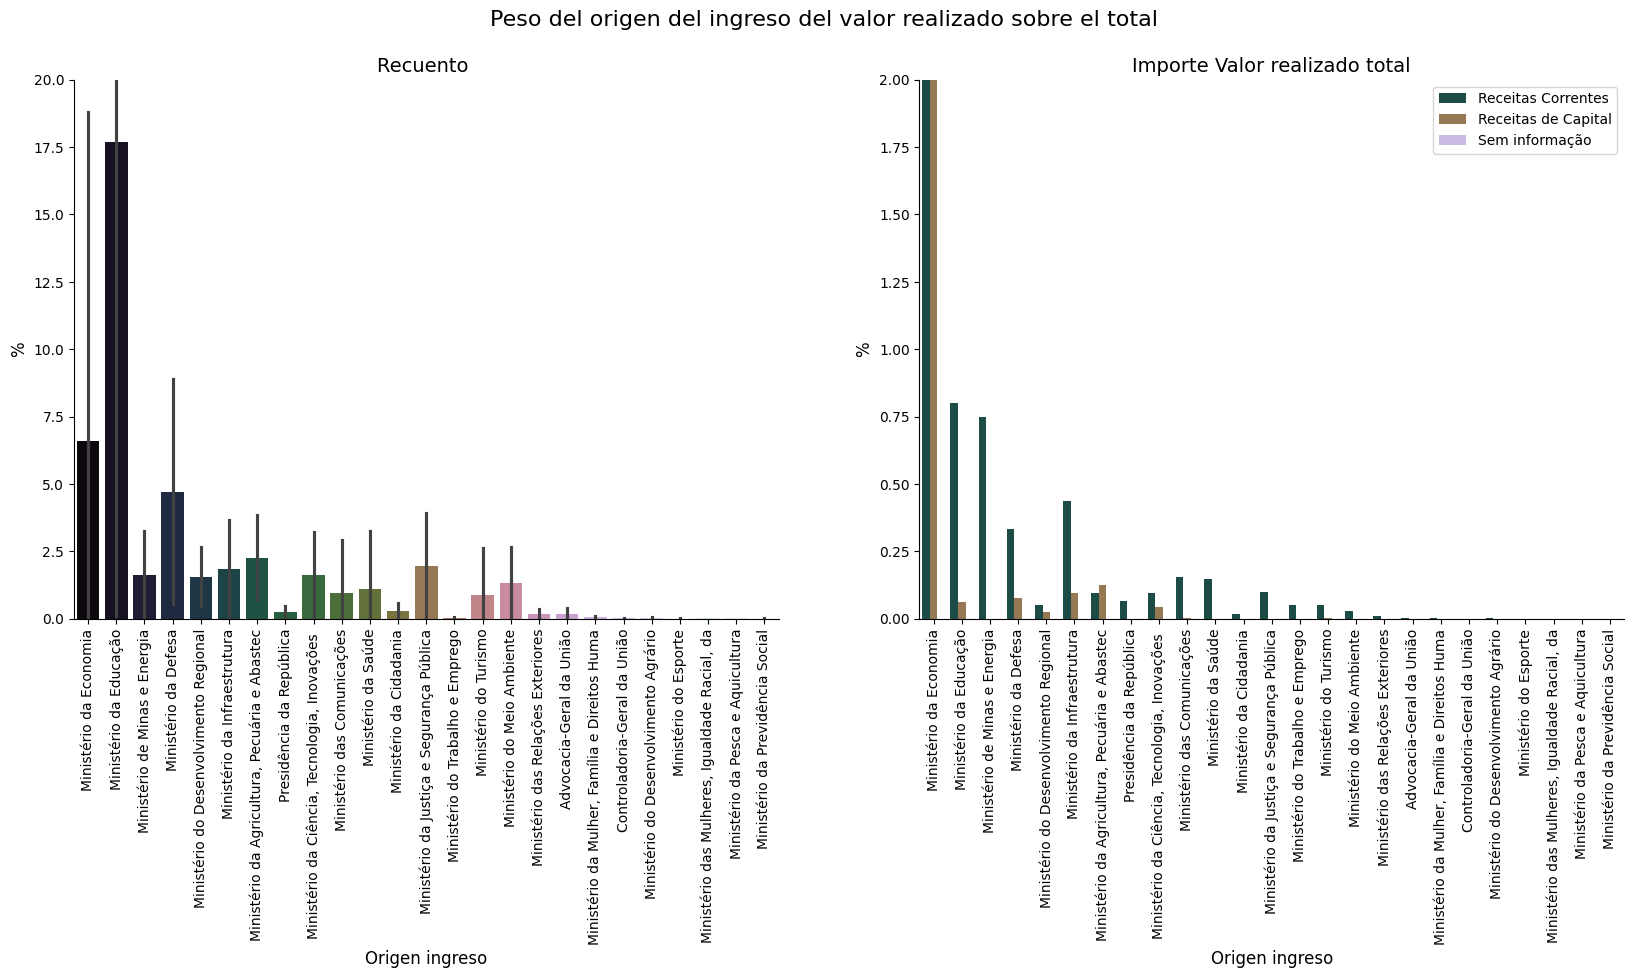

In [20]:
orden_ministerios = ['Ministério da Economia', 'Ministério da Educação',
       'Ministério de Minas e Energia', 'Ministério da Defesa',
       'Ministério do Desenvolvimento Regional',
       'Ministério da Infraestrutura',
       'Ministério da Agricultura, Pecuária e Abastec',
       'Presidência da República',
       'Ministério da Ciência, Tecnologia, Inovações ',
       'Ministério das Comunicações', 'Ministério da Saúde',
       'Ministério da Cidadania', 'Ministério da Justiça e Segurança Pública',
       'Ministério do Trabalho e Emprego', 'Ministério do Turismo',
       'Ministério do Meio Ambiente', 'Ministério das Relações Exteriores',
       'Advocacia-Geral da União',
       'Ministério da Mulher, Família e Direitos Huma',
       'Controladoria-Geral da União', 'Ministério do Desenvolvimento Agrário',
       'Ministério do Esporte',
       'Ministério das Mulheres, Igualdade Racial, da',
       'Ministério da Pesca e Aquicultura',
       'Ministério da Previdência Social']

fig, axes = plt.subplots(1, 2, sharex= False, sharey=False, figsize= (20,7))
fig.suptitle('Peso del origen del ingreso del valor realizado sobre el total', fontsize=16)


sns.barplot(data=df_importes_agrupación_organo_superior_2, x='NOMBRE_ÓRGANO_SUPERIOR', y= 'Peso_categoria', palette='cubehelix',ax=axes[0], order= orden_ministerios)
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0].set_ylabel('%', fontsize = 12)
axes[0].set_xlabel('Origen ingreso', fontsize = 12)
axes[0].set_title('Recuento ', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].set_ylim([0,20])


sns.barplot(data=df_importes_agrupación_organo_superior_2, x='NOMBRE_ÓRGANO_SUPERIOR', y= 'Peso_total_valor_realizado', palette='cubehelix',ax=axes[1],  hue='CATEGORIA_ECONÓMICA_AGRUPADA', order= orden_ministerios)
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].set_ylabel('%', fontsize = 12)
axes[1].set_xlabel('Origen ingreso', fontsize = 12)
axes[1].set_title('Importe Valor realizado total', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_ylim([0,2])
axes[1].legend();

In [21]:
print(f'NOTA: En el caso de {df_importes_agrupación_organo_superior_2.sort_values('Peso_total_valor_realizado', ascending=False).iloc[0][0]} el peso total del valor realizado , para las {df_importes_agrupación_organo_superior_2.sort_values('Peso_total_valor_realizado', ascending=False).iloc[0][1]} es de {round(df_importes_agrupación_organo_superior_2.sort_values('Peso_total_valor_realizado', ascending=False).iloc[0,14],2)}%')
print(f'En el caso de {df_importes_agrupación_organo_superior_2.sort_values('Peso_total_valor_realizado', ascending=False).iloc[0][0]} el peso total del valor realizado , para las {df_importes_agrupación_organo_superior_2.sort_values('Peso_total_valor_realizado', ascending=False).iloc[1][1]} es de {round(df_importes_agrupación_organo_superior_2.sort_values('Peso_total_valor_realizado', ascending=False).iloc[1,14],2)}%')

NOTA: En el caso de Ministério da Economia el peso total del valor realizado , para las Receitas Correntes es de 48.31%
En el caso de Ministério da Economia el peso total del valor realizado , para las Receitas de Capital es de 48.07%


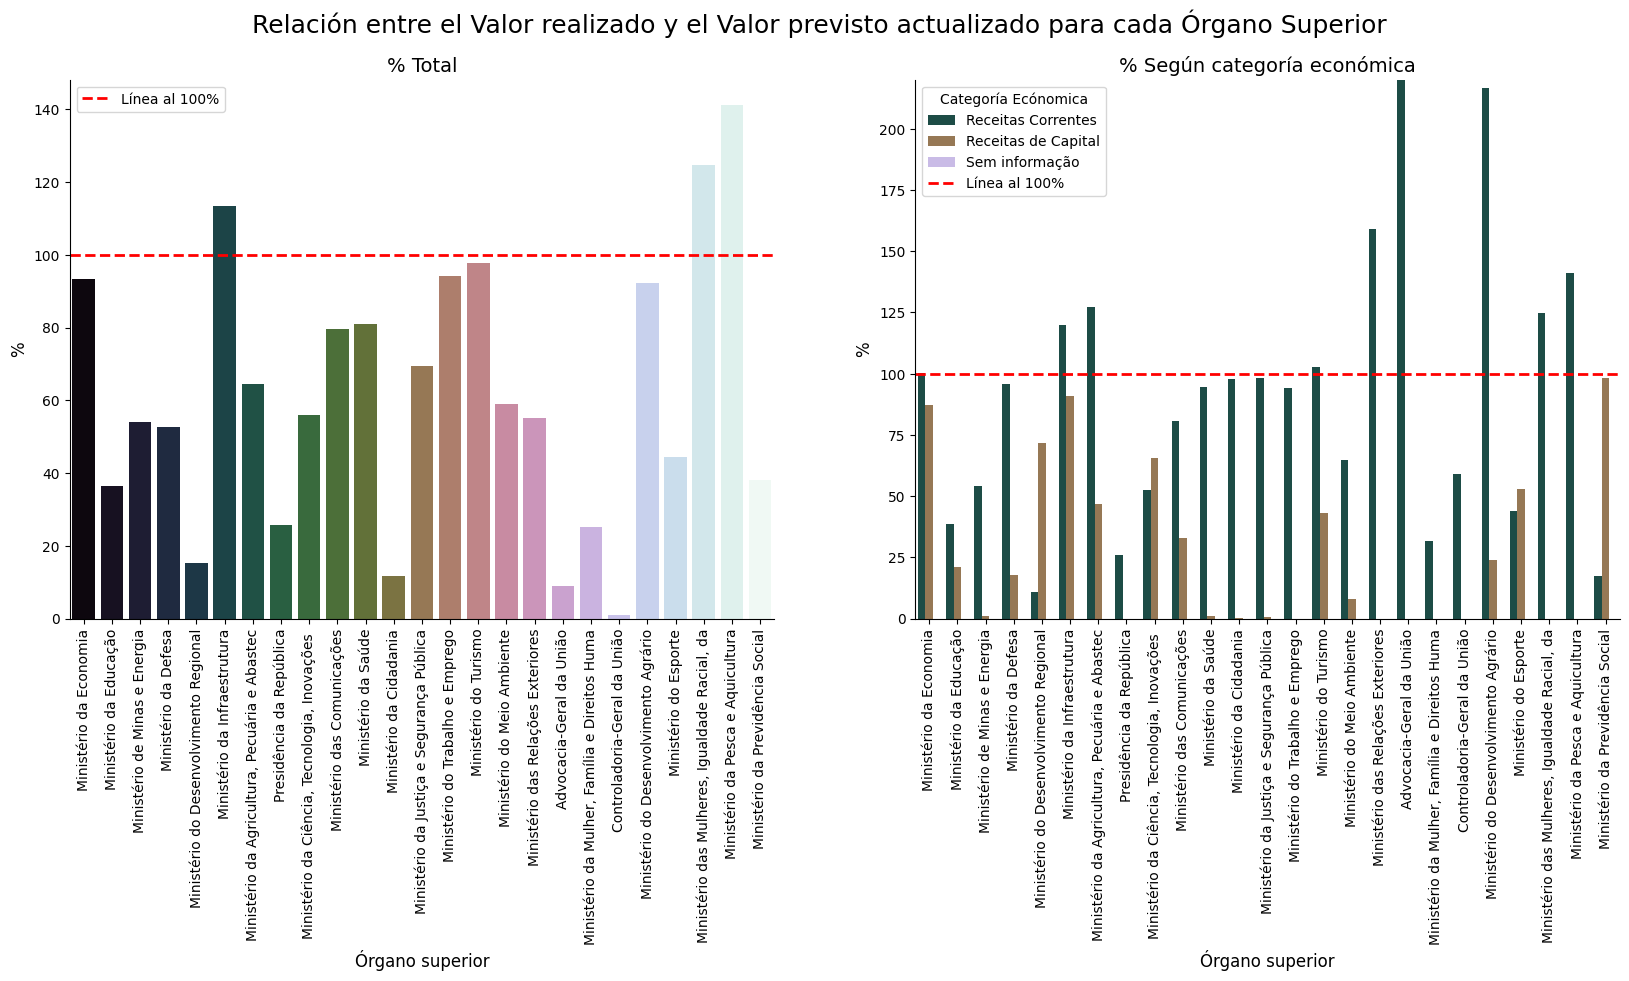

In [22]:
fig, axes = plt.subplots(1, 2, sharex= True, sharey=False, figsize= (20,7))
fig.suptitle('Relación entre el Valor realizado y el Valor previsto actualizado para cada Órgano Superior', fontsize=18)

sns.barplot(data=df_importes_agrupación_organo_superior, x='NOMBRE_ÓRGANO_SUPERIOR', y='VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', palette='cubehelix', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0].set_ylabel('%', fontsize = 12)
axes[0].set_xlabel('Órgano superior', fontsize = 12)
axes[0].set_title('% Total', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Línea al 100%')
axes[0].legend()

sns.barplot(data=df_importes_agrupación_organo_superior_1, x='NOMBRE_ÓRGANO_SUPERIOR', y='VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO',hue='CATEGORIA_ECONÓMICA_AGRUPADA', hue_order=['Receitas Correntes', 'Receitas de Capital', 'Sem informação'],palette='cubehelix', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].set_ylabel('%', fontsize = 12)
axes[1].set_xlabel('Órgano superior', fontsize = 12)
axes[1].set_title('% Según categoría económica', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_ylim([0,220])
axes[1].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Línea al 100%')
axes[1].legend(title = 'Categoría Ecónomica', title_fontsize =10);

In [23]:
print(f'NOTA: En el caso de {df_importes_agrupación_organo_superior_1.sort_values('VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', ascending=False).index[4][0]} la relación entre el valor realizado y el valor previsto actualizado, para las {df_importes_agrupación_organo_superior_1.sort_values('VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', ascending=False).index[4][1]} es de {round(df_importes_agrupación_organo_superior_1.sort_values('VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', ascending=False).iloc[4,3],2)}%')

NOTA: En el caso de Advocacia-Geral da União la relación entre el valor realizado y el valor previsto actualizado, para las Receitas Correntes es de 4038.43%


# 4.  VISUALIZACIONES POR CATEGORÍA ECONÓMICA Y ORIGEN DE INGRESO

In [24]:
df_importes_agrupación_categoria_economica_dif_metricas=df_total_anos.groupby('CATEGORIA_ECONÓMICA_AGRUPADA')[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].agg(["mean", "sum", "count"]).reset_index()

df_importes_agrupación_categoria_economica_dif_metricas["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_importes_agrupación_categoria_economica_dif_metricas.iloc[:,8]/df_importes_agrupación_categoria_economica_dif_metricas.iloc[:,2])*100
df_importes_agrupación_categoria_economica_dif_metricas["DIF VALOR_REALIZADO Y VALOR_PREVISTO_ACTUALIZADO"] = ((df_importes_agrupación_categoria_economica_dif_metricas.iloc[:,2]-df_importes_agrupación_categoria_economica_dif_metricas.iloc[:,8])/df_importes_agrupación_categoria_economica_dif_metricas.iloc[:,2])*100

df_importes_agrupación_categoria_economica_dif_metricas['Peso_categoria']=df_importes_agrupación_categoria_economica_dif_metricas.iloc[:,9]/df_importes_agrupación_categoria_economica_dif_metricas.iloc[:,9].sum()*100
df_importes_agrupación_categoria_economica_dif_metricas['Peso total valor realizado']=df_importes_agrupación_categoria_economica_dif_metricas.iloc[:,8]/df_total_anos.VALOR_REALIZADO_SIN_0.sum()
#df_importes_agrupación_categoria_economica_dif_metricas

In [25]:
df_receitas_correntes = df_total_anos[df_total_anos.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas Correntes']
df_receitas_correntes_origen_ingreso = df_receitas_correntes.groupby("ORIGEN_INGRESO")[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].agg(["mean", "sum", "count"]).reset_index()

df_receitas_correntes_origen_ingreso["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_receitas_correntes_origen_ingreso.iloc[:,8]/df_receitas_correntes_origen_ingreso.iloc[:,2])*100
df_receitas_correntes_origen_ingreso["DIF VALOR_REALIZADO Y VALOR_PREVISTO_ACTUALIZADO"] = ((df_receitas_correntes_origen_ingreso.iloc[:,2]-df_receitas_correntes_origen_ingreso.iloc[:,8])/df_receitas_correntes_origen_ingreso.iloc[:,2])*100

df_receitas_correntes_origen_ingreso['Peso_categoria']=df_receitas_correntes_origen_ingreso.iloc[:,9]/df_receitas_correntes_origen_ingreso.iloc[:,9].sum()*100
df_receitas_correntes_origen_ingreso['Peso_total_valor_realizado']=df_receitas_correntes_origen_ingreso.iloc[:,8]/df_receitas_correntes.VALOR_REALIZADO.sum()*100
#df_receitas_correntes_origen_ingreso

In [26]:
df_receitas_capital = df_total_anos[df_total_anos.CATEGORIA_ECONÓMICA_AGRUPADA=='Receitas de Capital']
df_receitas_capital_origen_ingreso = df_receitas_capital.groupby("ORIGEN_INGRESO")[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].agg(["mean", "sum", "count"]).reset_index()

df_receitas_capital_origen_ingreso["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_receitas_capital_origen_ingreso.iloc[:,8]/df_receitas_capital_origen_ingreso.iloc[:,2])*100
df_receitas_capital_origen_ingreso["DIF VALOR_REALIZADO Y VALOR_PREVISTO_ACTUALIZADO"] = ((df_receitas_capital_origen_ingreso.iloc[:,2]-df_receitas_capital_origen_ingreso.iloc[:,8])/df_receitas_capital_origen_ingreso.iloc[:,2])*100

df_receitas_capital_origen_ingreso['Peso_categoria']=df_receitas_capital_origen_ingreso.iloc[:,9]/df_receitas_capital_origen_ingreso.iloc[:,9].sum()*100
df_receitas_capital_origen_ingreso['Peso_total_valor_realizado']=df_receitas_capital_origen_ingreso.iloc[:,8]/df_receitas_capital.VALOR_REALIZADO.sum()*100
#df_receitas_capital_origen_ingreso

In [27]:
df_origen_ingreso_total_1 = df_total_anos.groupby(['CATEGORIA_ECONÓMICA_AGRUPADA', 'ORIGEN_INGRESO'])[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].agg(["mean", "sum", "count"]).reset_index()

df_origen_ingreso_total_1["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_origen_ingreso_total_1.iloc[:,9]/df_origen_ingreso_total_1.iloc[:,3])*100
df_origen_ingreso_total_1["DIF VALOR_REALIZADO Y VALOR_PREVISTO_ACTUALIZADO"] = ((df_origen_ingreso_total_1.iloc[:,3]-df_origen_ingreso_total_1.iloc[:,9])/df_origen_ingreso_total_1.iloc[:,3])*100

df_origen_ingreso_total_1['Peso_categoria']=df_origen_ingreso_total_1.iloc[:,10]/df_origen_ingreso_total_1.iloc[:,10].sum()*100
df_origen_ingreso_total_1['Peso_total_valor_realizado']=df_origen_ingreso_total_1.iloc[:,9]/df_total_anos.VALOR_REALIZADO.sum()*100
#df_origen_ingreso_total_1

In [28]:
df_origen_ingreso_total = df_total_anos.groupby("ORIGEN_INGRESO")[['VALOR_PREVISTO_ACTUALIZADO_SIN_0',
       'VALOR_REGISTRADO_SIN_0', 'VALOR_REALIZADO_SIN_0']].agg(["mean", "sum", "count"]).reset_index()

df_origen_ingreso_total["VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO"] = (df_origen_ingreso_total.iloc[:,8]/df_origen_ingreso_total.iloc[:,2])*100
df_origen_ingreso_total["DIF VALOR_REALIZADO Y VALOR_PREVISTO_ACTUALIZADO"] = ((df_origen_ingreso_total.iloc[:,2]-df_origen_ingreso_total.iloc[:,8])/df_origen_ingreso_total.iloc[:,2])*100

df_origen_ingreso_total['Peso_categoria']=df_origen_ingreso_total.iloc[:,9]/df_origen_ingreso_total.iloc[:,9].sum()*100
df_origen_ingreso_total['Peso_total_valor_realizado']=df_origen_ingreso_total.iloc[:,8]/df_total_anos.VALOR_REALIZADO.sum()*100
#df_receitas_correntes_origen_ingreso

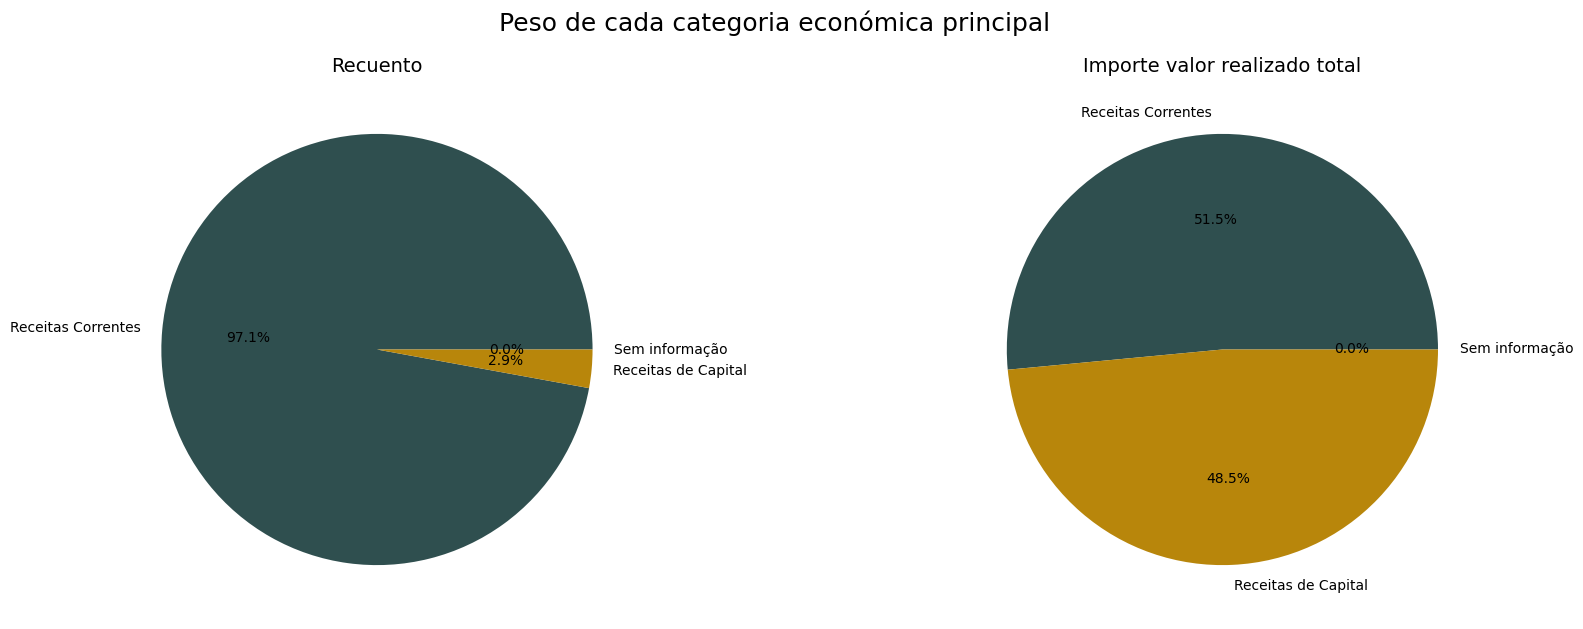

In [29]:
fig, axes = plt.subplots(1, 2, sharex= True, sharey=False, figsize= (20,7))
fig.suptitle('Peso de cada categoria económica principal', fontsize=18)

axes[0].pie("Peso_categoria", labels='CATEGORIA_ECONÓMICA_AGRUPADA', autopct='%1.1f%%', data=df_importes_agrupación_categoria_economica_dif_metricas, colors=['darkslategrey', 'darkgoldenrod','plum'])
plt.xticks(rotation=90, fontsize=10)
axes[0].set_title('Recuento', fontsize = 14)

axes[1].pie("Peso total valor realizado", labels='CATEGORIA_ECONÓMICA_AGRUPADA', autopct='%1.1f%%', data=df_importes_agrupación_categoria_economica_dif_metricas, colors=['darkslategrey', 'darkgoldenrod','plum'])
plt.xticks(rotation=90, fontsize=10)
axes[1].set_title('Importe valor realizado total', fontsize = 14);

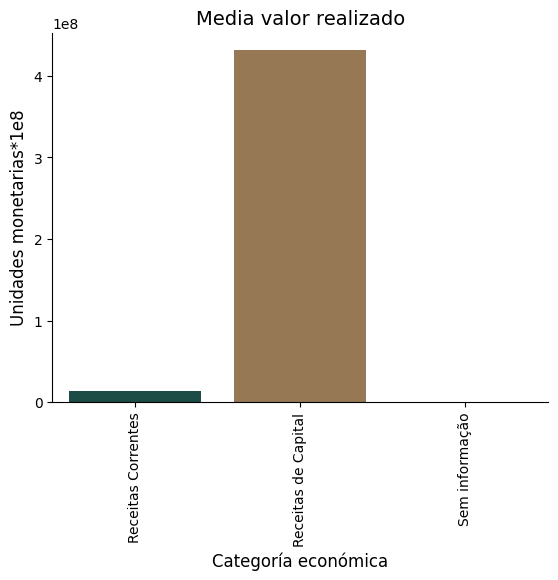

In [30]:
sns.barplot(data=df_importes_agrupación_categoria_economica_dif_metricas, x='CATEGORIA_ECONÓMICA_AGRUPADA', y=df_importes_agrupación_categoria_economica_dif_metricas['VALOR_REALIZADO_SIN_0']['mean'], palette='cubehelix')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Unidades monetarias*1e8', fontsize = 12)
plt.xlabel('Categoría económica', fontsize = 12)
plt.title('Media valor realizado', fontsize = 14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);


In [31]:
#se.reporte_1(df_total_anos).iloc[17:20,:].reset_index()

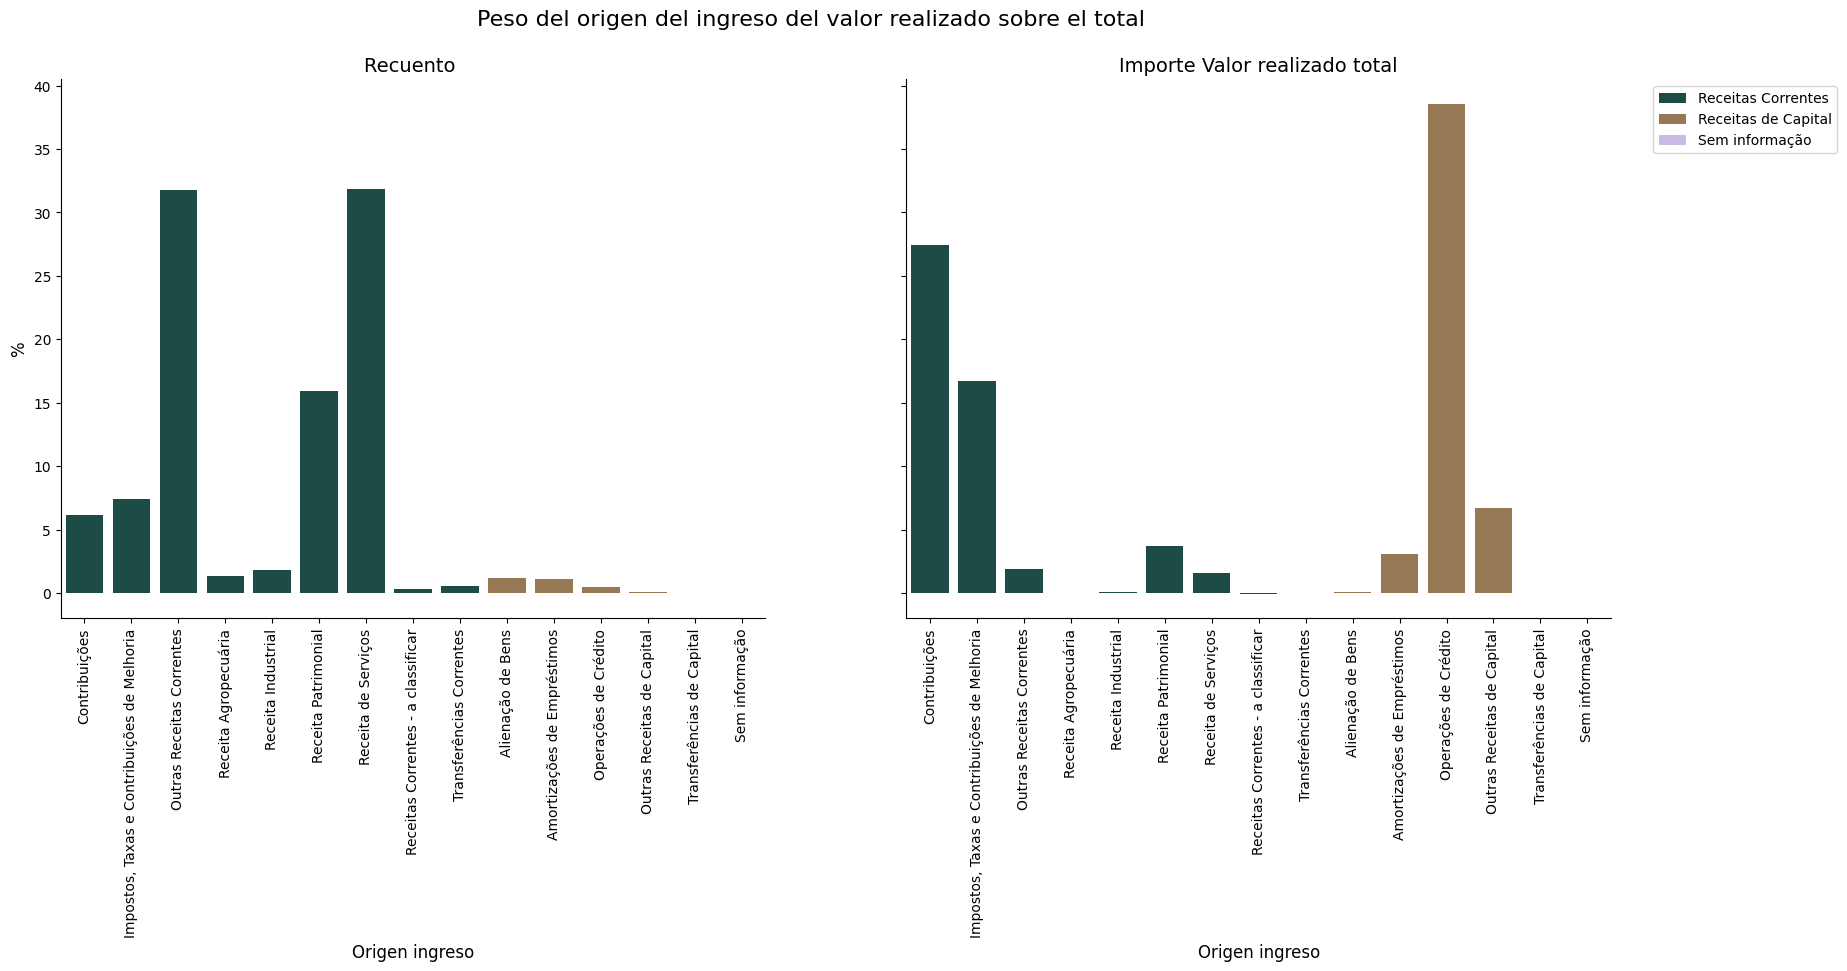

In [35]:
fig, axes = plt.subplots(1, 2, sharex= True, sharey=True, figsize= (20,7))
fig.suptitle('Peso del origen del ingreso del valor realizado sobre el total', fontsize=16)


sns.barplot(data=df_origen_ingreso_total_1, x='ORIGEN_INGRESO', y= 'Peso_categoria', palette='cubehelix',ax=axes[0], hue='CATEGORIA_ECONÓMICA_AGRUPADA')
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0].set_ylabel('%', fontsize = 12)
axes[0].set_xlabel('Origen ingreso', fontsize = 12)
axes[0].set_title('Recuento ', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].legend().remove()


sns.barplot(data=df_origen_ingreso_total_1, x='ORIGEN_INGRESO', y= 'Peso_total_valor_realizado', palette='cubehelix',ax=axes[1],  hue='CATEGORIA_ECONÓMICA_AGRUPADA')
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].set_ylabel('%', fontsize = 12)
axes[1].set_xlabel('Origen ingreso', fontsize = 12)
axes[1].set_title('Importe Valor realizado total', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].legend(bbox_to_anchor=(1.05,1), loc = "upper left");

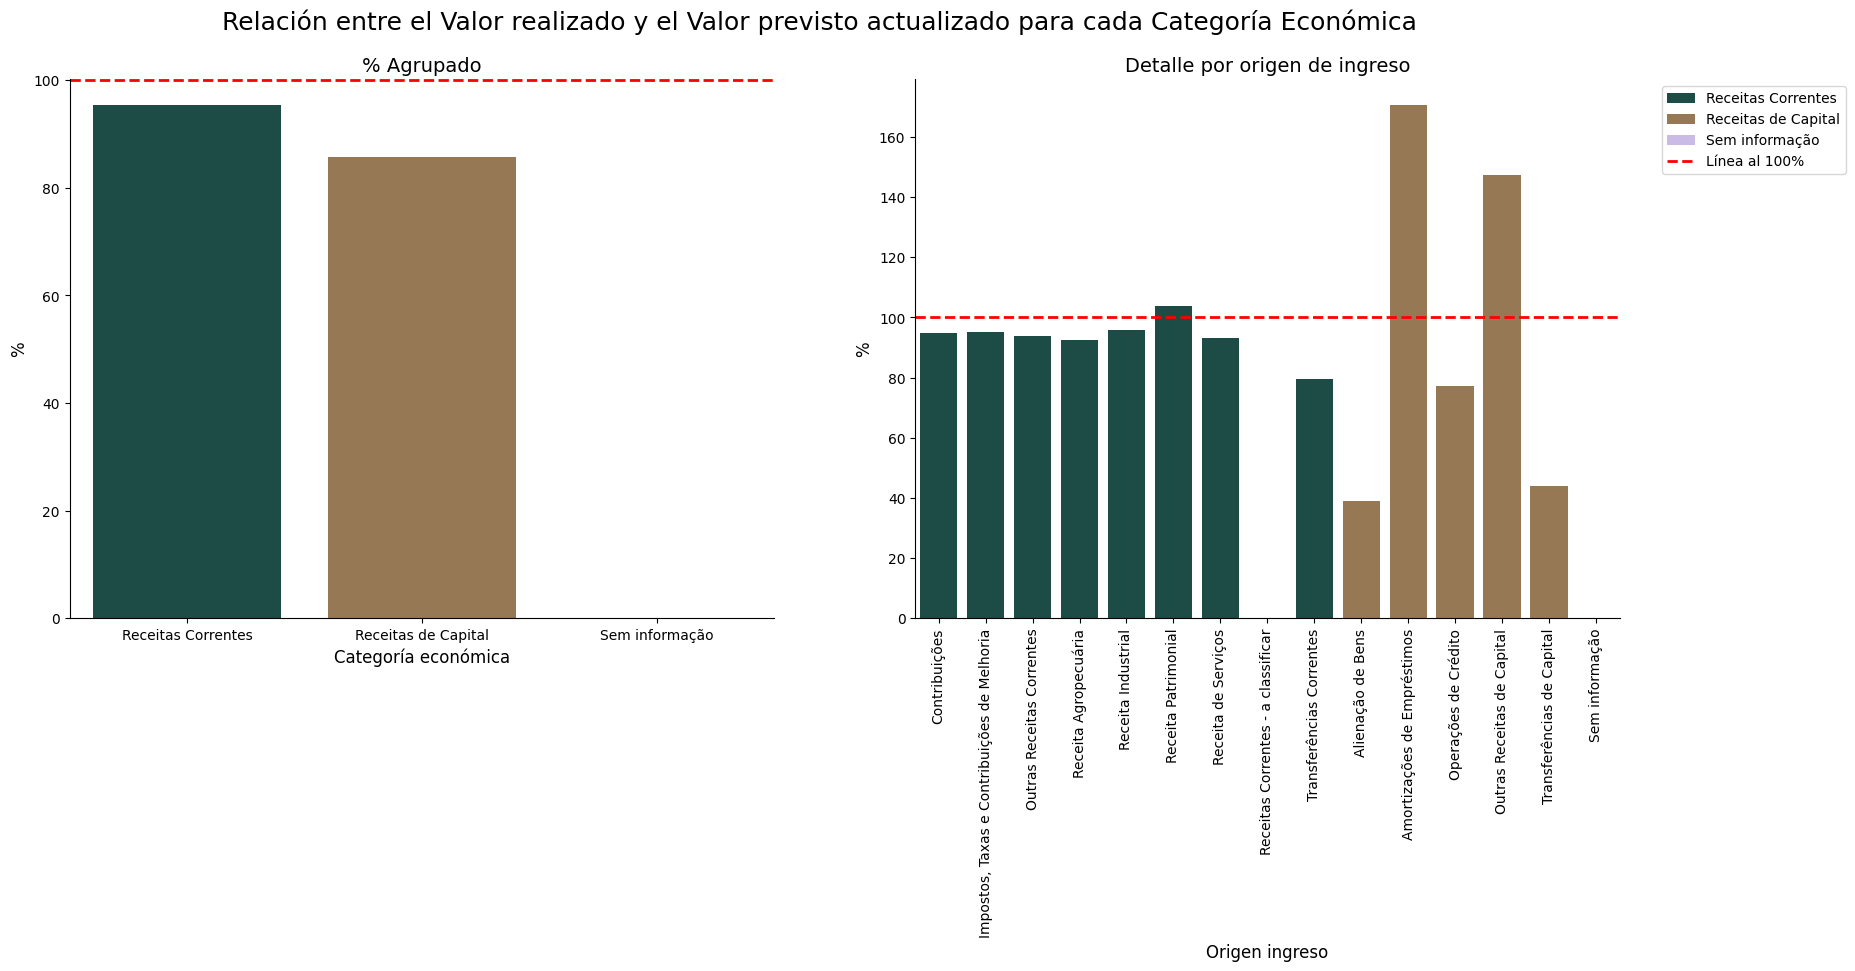

In [33]:
fig, axes = plt.subplots(1, 2, sharex= False, sharey=False, figsize= (20,7))
fig.suptitle('Relación entre el Valor realizado y el Valor previsto actualizado para cada Categoría Económica', fontsize=18)

sns.barplot(data=df_importes_agrupación_categoria_economica_dif_metricas, x='CATEGORIA_ECONÓMICA_AGRUPADA', y='VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', palette='cubehelix', ax= axes[0])
axes[0].set_ylabel('%', fontsize = 12)
axes[0].set_xlabel('Categoría económica', fontsize = 12)
axes[0].set_title('% Agrupado', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Línea al 100%')


sns.barplot(data=df_origen_ingreso_total_1, x='ORIGEN_INGRESO', y= 'VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', hue='CATEGORIA_ECONÓMICA_AGRUPADA', palette='cubehelix',ax=axes[1])
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].set_ylabel('%', fontsize = 12)
axes[1].set_xlabel('Origen ingreso', fontsize = 12)
axes[1].set_title('Detalle por origen de ingreso', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Línea al 100%')
axes[1].legend(bbox_to_anchor=(1.05,1), loc = "upper left");


# 5.  RESUMEN DISPERSIÓN DE LA RELACIÓN ENTRE EL VALOR REALIZADO Y EL VALOR PREVISTO ACTUALIZADO POR AÑO, ÓRGANO SUPERIOR Y ORIGEN DE INGRESO

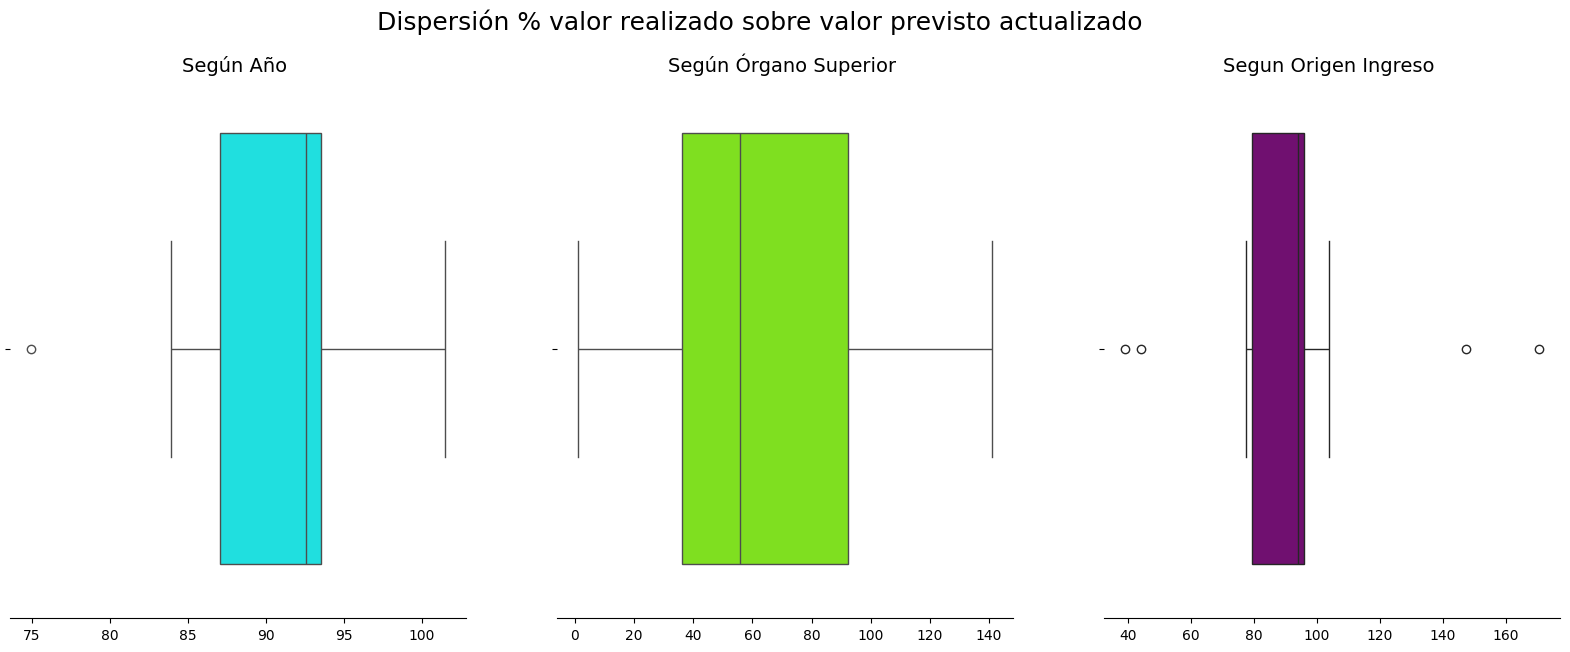

In [34]:
fig, axes = plt.subplots(1, 3, sharex= False, sharey=False, figsize= (20,7))
fig.suptitle('Dispersión % valor realizado sobre valor previsto actualizado', fontsize=18)
sns.boxplot(x='VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', data=df_origen_ingreso_total, color='purple', ax=axes[2])
axes[2].set_title('Segun Origen Ingreso ', fontsize = 14)
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['left'].set_visible(False)
axes[2].set_xlabel('', fontsize = 0)

sns.boxplot(x='VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', data=df_importes_agrupación_organo_superior, color='chartreuse', ax=axes[1])
axes[1].set_title('Según Órgano Superior ', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_xlabel('', fontsize = 0)

sns.boxplot(x='VALOR_REALIZADO/VALOR_PREVISTO_ACTUALIZADO', data=df_importes_agrupación_anos, color='cyan', ax=axes[0])
axes[0].set_title('Según Año ', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].set_xlabel('', fontsize = 0);

# 6. CONCLUSIONES Y RECOMENDACIONES

1. **Resumen de Hallazgos:**

   - Identificar las categorías y períodos con mayor discrepancia entre lo previsto y lo realizado:
      - Como hemos podido observar, las categorías con más discrepancia entre los previsto y lo realizado son las de Ingresos de Capital en concreto, las que proceden de Amortizaciones de préstamos y de Otras rentas de capital, con una super ejecución y enajenaciones de activos y Transferencias de capital con una subejecución elevado.
      - En cuanto a los periodos, la mayoría de años tienen una subejecución, aunque bastantes cercanos al 100%. Solo el año 2020 está por encima del 100%, es decir, se recaudó más de lo previsto, y el año 2017 fué el que más lejos se quedó de lo estimado, con una relación por debajo del 75%.
      - Por último, el Órgano Superior que más desviación tiene entre lo previsto y lo recaudado es el Controlador General de la Unión y el que más cercano está a lo previsto es el Ministerio de Turismo. La mayoria de Órganos superiores tienen un exceso de estimación, solo en 3 ministerios el valor recaudado es superior al estimado: el Ministerio de Infraestructura, el de Mujeres e Igualdad racial, y el de Pesca y Agricultura.

   - Describir tendencias observadas en la ejecución de ingresos.
      - Los ingresos corrientes representan un 97,1% de los registros que se hacen del valor realizado, representando los ingresos de capital solo un 2,9% de los registros realizados. Sin embargo, en relación al importe recaudado, este 2,9% representa un 48,5% del valor recaudado total. Esto se debe a que los registros de ingresos de capital tienen una media muy superior a los ingresos corrientes. Por tanto, cualquier desviación en la estimación de los ingresos de capital afectan significativamente en las desviaciones totales.
         - En los ingresos corrientes, las que más peso tienen en la recaudación son las contribuciones y los impuestos, tasas y contribuciones de mejora.
         - En los ingresos de capital, las que más peso tienen, con diferencia, son las operaciones de crétido, que representan casi el 40% del total recaudado, a pesar que no llega ni al 2% de los registros realizados. 
      - En cuanto al órgano superior encargado de la recaudación, el ministerio de economía recauda casi el 50% del total del valor realizado, siendo el que menos recuada el Ministerio de Seguridad Social. Asímismo, el que más registros realiza es el ministerio de educación, siendo el segundo ministerio con mayor recaudación.

2. **Propuestas de Mejora:**
   - Sugerir acciones para mejorar la precisión en la planificación y ejecución de los ingresos:
      -Como hemos observado, el registro de las previsiones se realizan en enero y abril en su gran mayoría y se hacen registros por importes muy elevados.
      - Para mejorar la precisión sería conveniente ir registrando las previsiones de forma mensual, de este modo podríamos ver en qué mes existe más variación entre lo previsto y lo registrado y además, al ir analizando la variación entre el año anterior y el actual se puede ir afinando los meses posteriores, permitiendonos hacer una estimación más adecuada.